In [53]:
from openai import OpenAI
import os
client = OpenAI()

In [54]:
import re
import requests
from bs4 import BeautifulSoup

def fetch_and_remove_citation_numbers(title):
    # Fetch content from the Wikipedia page
    wikipedia_url = f'https://en.wikipedia.org/wiki/{title.replace(" ", "_")}'
    response = requests.get(wikipedia_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Remove only the citation numbers within the text of each paragraph
    for paragraph in soup.find_all('p'):
        paragraph.string = re.sub(r'\[\d+\]', '', paragraph.text.strip())

    # Extract text content from the modified HTML
    all_paragraphs = soup.find_all('p')
    text_content = ' '.join([p.get_text() for p in all_paragraphs])

    return text_content


In [55]:
wikipedia_page_title_example = 'Anthony_Horowitz'

# Fetch content from the Wikipedia page
wikipedia_page_content_example = fetch_and_remove_citation_numbers(wikipedia_page_title_example)
print(wikipedia_page_content_example)

 Anthony John Horowitz CBE (born 5 April 1955) is an English novelist and screenwriter specialising in mystery and suspense. His works for children and young adult readers include the Alex Rider series featuring a 14-year-old British boy who spies for MI6, The Power of Five series (known as The Gatekeepers in the US), and The Diamond Brothers series. His works for adults include the play Mindgame (2001); two Sherlock Holmes novels, The House of Silk (2011) and Moriarty (2014); two novels featuring his own detective Susan Ryeland, Magpie Murders (2016) and Moonflower Murders (2020); and four novels featuring a fictionalised version of himself as a companion and chronicler to private investigator Daniel Hawthorne: The Word Is Murder (2017), The Sentence Is Death (2018), A Line to Kill (2021), The Twist of a Knife (2022) and the upcoming Close to Death (2024). The estate of James Bond creator Ian Fleming also chose Horowitz to write Bond novels utilising unpublished material by Fleming, s

In [56]:
wikipedia_page_title='Jessica Livingston'
wikipedia_page_content = fetch_and_remove_citation_numbers(wikipedia_page_title)
print(wikipedia_page_content)

  Jessica Livingston (born 1971) is an American founding partner of the seed stage venture firm Y Combinator and author. She is the wife of founding partner Paul Graham. Livingston grew up in the Boston area. In 1989, she graduated from Phillips Academy. She received a Bachelor of Arts with a major in English from Bucknell University. Prior to founding Y Combinator, Livingston was vice president of marketing at Adams Harkness Financial Group. Livingston met Paul Graham, Robert Morris and Trevor Blackwell (the co-founders of dot-com company Viaweb) at a party in Cambridge. They discussed creating a startup incubator and in 2005 the four co-founded Y Combinator. In the early days of YC, Livingston and Graham hosted weekly meals for their founders at their home near Cambridge. Sam Altman (a former YC partner) credits Livingston with being essential to the transformation of Y Combinator into a startup ecosystem. When Graham stepped down from his role leading Y Combinator, handing over to A

In [57]:
wikipedia_page_content_example=wikipedia_page_content_example.split('.')

#print(wikipedia_page_content2)
i=1
for s in wikipedia_page_content_example:
    print(i,s)
    i=i+1

1  Anthony John Horowitz CBE (born 5 April 1955) is an English novelist and screenwriter specialising in mystery and suspense
2  His works for children and young adult readers include the Alex Rider series featuring a 14-year-old British boy who spies for MI6, The Power of Five series (known as The Gatekeepers in the US), and The Diamond Brothers series
3  His works for adults include the play Mindgame (2001); two Sherlock Holmes novels, The House of Silk (2011) and Moriarty (2014); two novels featuring his own detective Susan Ryeland, Magpie Murders (2016) and Moonflower Murders (2020); and four novels featuring a fictionalised version of himself as a companion and chronicler to private investigator Daniel Hawthorne: The Word Is Murder (2017), The Sentence Is Death (2018), A Line to Kill (2021), The Twist of a Knife (2022) and the upcoming Close to Death (2024)
4  The estate of James Bond creator Ian Fleming also chose Horowitz to write Bond novels utilising unpublished material by Fl

In [58]:
def has_number(sentence):
    # Define a regular expression pattern to match numbers
    pattern = r'\d+'
    
    # Use re.search to find the pattern in the sentence
    match = re.search(pattern, sentence)
    
    # If a match is found, the sentence contains a number
    return bool(match)

This function create few-shot classification prompts prompt

In [59]:

def Create_ex_prompt(Numbofex):
    i=1
    labeled_data = [{"role": "system",
                     "content": " Classify the following text sentences based on  following examples."}]

    for  w in wikipedia_page_content_example:
        if i <=Numofex:
            if w!="":
                labeled_data .append({"role": "user",
                                "content": w+"."})
                if has_number(w)==True:
                    labeled_data .append({"role": "assistant",
                                "content": 'It contains digit. So I label it as True. True'})
                elif has_number(w)==False:
                    labeled_data .append({"role": "assistant",
                                "content": 'It doe not contain any digit. So I label it as False. False'})
                i=i+1
    labeled_data.append({"role":"user", "content": "Now classify the following text based on above examples"+wikipedia_page_content})

    return labeled_data

Numofex=50
labeled_data=Create_ex_prompt(Numofex)
labeled_data

[{'role': 'system',
  'content': ' Classify the following text sentences based on  following examples.'},
 {'role': 'user',
  'content': ' Anthony John Horowitz CBE (born 5 April 1955) is an English novelist and screenwriter specialising in mystery and suspense.'},
 {'role': 'assistant',
  'content': 'It contains digit. So I label it as True. True'},
 {'role': 'user',
  'content': ' His works for children and young adult readers include the Alex Rider series featuring a 14-year-old British boy who spies for MI6, The Power of Five series (known as The Gatekeepers in the US), and The Diamond Brothers series.'},
 {'role': 'assistant',
  'content': 'It contains digit. So I label it as True. True'},
 {'role': 'user',
  'content': ' His works for adults include the play Mindgame (2001); two Sherlock Holmes novels, The House of Silk (2011) and Moriarty (2014); two novels featuring his own detective Susan Ryeland, Magpie Murders (2016) and Moonflower Murders (2020); and four novels featuring a

In [60]:
completion =  client.chat.completions.create(model="gpt-3.5-turbo", messages=labeled_data,temperature=0)
model_response = completion.choices[0].message.content
print(model_response)

Based on the examples provided, the classification of the text is as follows:

- Contains digit: True
- Does not contain digit: False

Sentence-wise classification:

1. Jessica Livingston (born 1971) is an American founding partner of the seed stage venture firm Y Combinator and author. - True
2. She is the wife of founding partner Paul Graham. - False
3. Livingston grew up in the Boston area. - False
4. In 1989, she graduated from Phillips Academy. - True
5. She received a Bachelor of Arts with a major in English from Bucknell University. - True
6. Prior to founding Y Combinator, Livingston was vice president of marketing at Adams Harkness Financial Group. - False
7. Livingston met Paul Graham, Robert Morris and Trevor Blackwell (the co-founders of dot-com company Viaweb) at a party in Cambridge. - False
8. They discussed creating a startup incubator and in 2005 the four co-founded Y Combinator. - True
9. In the early days of YC, Livingston and Graham hosted weekly meals for their fou

In [68]:
truelabels=[]
i=1
wikipedia_page_content2=wikipedia_page_content.split('.')
#print(wikipedia_page_content2)
for s in range(len(wikipedia_page_content2)):
    #print((wikipedia_page_content2[s]))
    #print(has_number(wikipedia_page_content2[s]))
    truelabels.append(has_number(wikipedia_page_content2[s]))
print(len(truelabels))

20


In [69]:
def contains_true(sentence):
    return 'True' in sentence
predicted_labels=[]
model_response2=model_response.split('Sentence-wise classification:\n')[1]
model_response3= model_response2.split('\n')


print(model_response3)
i=0
for s in (model_response3) :
    if i!=0:
        print(s)

        predicted_labels.append(contains_true(s))
    i=i+1

print(len(predicted_labels))

['', '1. Jessica Livingston (born 1971) is an American founding partner of the seed stage venture firm Y Combinator and author. - True', '2. She is the wife of founding partner Paul Graham. - False', '3. Livingston grew up in the Boston area. - False', '4. In 1989, she graduated from Phillips Academy. - True', '5. She received a Bachelor of Arts with a major in English from Bucknell University. - True', '6. Prior to founding Y Combinator, Livingston was vice president of marketing at Adams Harkness Financial Group. - False', '7. Livingston met Paul Graham, Robert Morris and Trevor Blackwell (the co-founders of dot-com company Viaweb) at a party in Cambridge. - False', '8. They discussed creating a startup incubator and in 2005 the four co-founded Y Combinator. - True', '9. In the early days of YC, Livingston and Graham hosted weekly meals for their founders at their home near Cambridge. - False', '10. Sam Altman (a former YC partner) credits Livingston with being essential to the trans

In [70]:
acc=0
for i in range ((17)):
    print(truelabels[i])
    print(predicted_labels)
    if truelabels[i]==predicted_labels[i]:
        acc=acc+1

print("acc",acc/17)

True
[True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True, True]
False
[True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True, True]
False
[True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True, True]
True
[True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True, True]
False
[True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True, True]
False
[True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True, True]
False
[True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True, True]
True
[True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True, True]
Fal

In [71]:
import numpy as np
finaltrue=[]
finalpred=[]
for i in range ((17)):
    finaltrue.append(truelabels[i])
    finalpred.append(predicted_labels[i])
    

print(len(finaltrue))
print(len(finalpred))
print(finaltrue)
print(finalpred)

# Sample boolean array

# Convert boolean values to strings
finaltrue_strings = [str(value) for value in finaltrue]
finalpred_strings = [str(value) for value in finalpred]


# Join the strings with a delimiter (e.g., comma) to create a single string
finaltrue_strings = ",".join(finaltrue_strings)
finalpred_strings = ",".join(finalpred_strings)
print(finaltrue_strings)
print(finalpred_strings)
# Open a file in write mode and write the boolean string to it
file_path = "truepred.txt"
with open(file_path, "w") as file:
    file.writelines(finaltrue_strings + '\n')
    file.writelines(finalpred_strings + '\n')
(finalpred_strings)

17
17
[True, False, False, True, False, False, False, True, False, False, False, True, True, True, False, True, True]
[True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True]
True,False,False,True,False,False,False,True,False,False,False,True,True,True,False,True,True
True,False,False,True,True,False,False,True,False,False,False,True,True,False,False,False,True


'True,False,False,True,True,False,False,True,False,False,False,True,True,False,False,False,True'

In [72]:
# Open the file in read mode and read the boolean strings
with open(file_path, "r") as file:
    boolean_string1 = file.readline().strip()  # Read the first boolean array
    boolean_string2 = file.readline().strip()  # Read the second boolean array

# Split the boolean strings into individual strings using the delimiter
boolean_strings1 = boolean_string1.split(",")
boolean_strings2 = boolean_string2.split(",")

# Convert the strings back to boolean values
boolean_array1 = [bool(value) for value in boolean_strings1]
boolean_array2 = [bool(value) for value in boolean_strings2]

# Print the reconstructed boolean arrays
print(boolean_array1)
print(boolean_array2)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


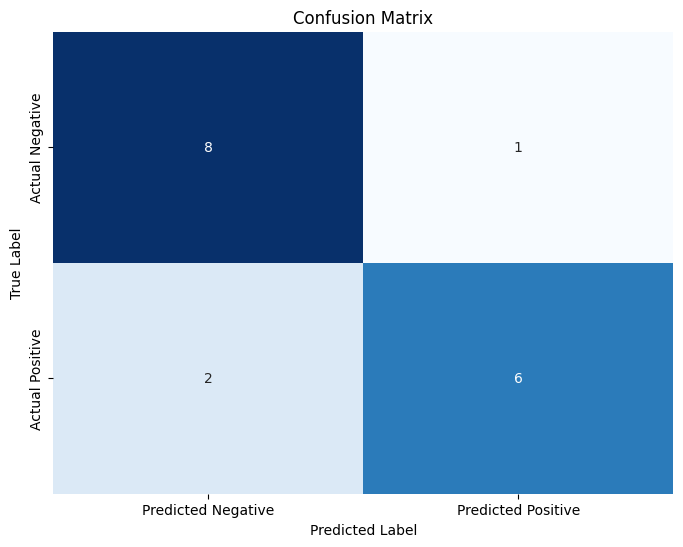

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate confusion matrix
cm = confusion_matrix(finaltrue, finalpred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig("Conf-matrix.png")
plt.show()



In [67]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(finaltrue, finalpred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.82
